# **Projeto de Machine Lerning DIO**
 ## **Criando modelos com Python e Machine Learning para prever a evolução do COVID-19 no Brasil**
 
[![author](https://img.shields.io/badge/author-evaldojunior-red.svg)](https://www.linkedin.com/in/evaldo-junior-89094244/) [![](https://img.shields.io/badge/python-3.9+-blue.svg)](https://www.python.org/downloads/release/python-365/) [![GPLv3 license](https://img.shields.io/badge/License-GPLv3-blue.svg)](http://perso.crans.org/besson/LICENSE.html)

<p align="center">
  <img src="COVID.png" >
</p>

## **SOBRE O PROJETO**

Este projeto tem por objetivo cumprir a ultima etapa do curso de 
Criando modelos com Python e Machine Learning para prever a evolução do COVID-19 no Brasil

A ideia central é desenvolver um modelo para prever os casos de covid19 no brasil utilizando modelos de machine Learning.


>Durante as aulas o professor Neylson utilizou a biblioteca <font color ="red">fbprophet</font>, porém, para este projeto eu farei a predição com a biblioteca <font color = 'red'>statsmodels</font>

---

## **SOBRE OS DADOS**

- **SNo** - Número de controle interno (Sequencial)
- **ObservationDate** - Data em que a contagem dos casos foi realizada
- **Province/State** - Estado onde o caso foi registrado
- **Country/Region** - Pais onde o caso foi registrado
- **Last Update** - Data e hora da ultima atualização
- **Confirmed** - Quantidade de casos confirmados
- **Deaths**- Quantidade de óbitos
- **Recovered** - Quantidade de pessoas curadas




---

## **1.1.ANÁLISE EXPLORATÓRIA DOS DADOS**

Começo o trabalho tentando entender melhor os dados. 
Faço a importação e já rodo o head e tail para ter uma noção do que tenho em mãos. 
Logo em seguida, já parto para a verificação de dados nulos. De cara já dá para ver que a coluna Province/State tem uma porrada de dados faltantes.

Por último, verifico se os tipos de dados estão condizentes com o que tenho em mãos. 

Aparentemente, a única coisa não muito legal é a quantidade de dados faltantes, de resto, está tudo bem. 


In [1]:
import pandas as pd 
import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [3]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0
26712,26713,2020-05-19,Zhejiang,Mainland China,2020-05-20 02:32:19,1268.0,1.0,1267.0


In [4]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     13831
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              26713 non-null  int64         
 1   ObservationDate  26713 non-null  datetime64[ns]
 2   Province/State   12882 non-null  object        
 3   Country/Region   26713 non-null  object        
 4   Last Update      26713 non-null  datetime64[ns]
 5   Confirmed        26713 non-null  float64       
 6   Deaths           26713 non-null  float64       
 7   Recovered        26713 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 1.6+ MB


In [6]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

### **1.2.BRASIL**

Conforme visto nas aulas, o foco do estudo será o Brasil.

Por conta disso já começo fazendo um filtro.

Aqui tenho que relatar algo interessante.
Ao tentar fazer o filtro sem renomear as colunas, acabei enfrentando problemas. A consulta simplesmente não me retornava valor algum.
Então, acabei executando o código que o professor utilizou na aula para fazer o rename das colunas. Depois disso, consegui fazer os filtros de forma bastante tranquila.


In [7]:
import re
def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

df.columns = [corrige_colunas(col) for col in df.columns]

In [8]:
dfBrasil = df.query('countryregion == "Brazil" & confirmed > 0')
dfBrasil.drop(['provincestate', 'sno'], axis = 1, inplace = True)
dfBrasil.head()

,observationdate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2020-02-26,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2020-02-27,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2020-02-28,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2020-02-29,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2020-03-01,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0


### **1.3.Numero de Casos Confirmados**

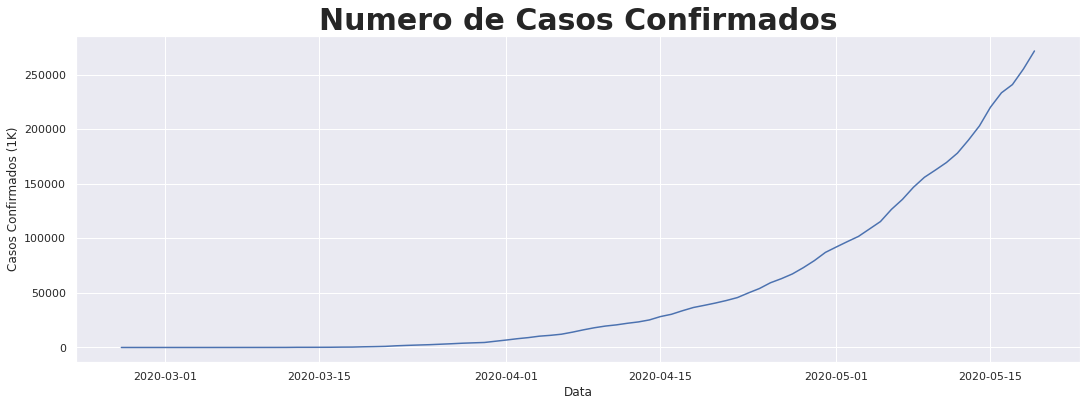

In [9]:
imagem = sns.lineplot(data = dfBrasil, x = 'observationdate', y = 'confirmed')
imagem.figure.set_size_inches(18,6)
imagem.set_ylabel('Casos Confirmados (1K)')
imagem.set_xlabel('Data')
imagem.set_title('Numero de Casos Confirmados', fontsize = 30, fontweight = 'bold');

### **1.4.Numero de Novos Casos**

Aqui criamos uma função lambda que é passada como parâmetro dentro de um método map.

Para que você entenda exatamente o que está acontecendo nesta célula eu vou te explicar passo a passo o que faz cada código desses.

Primeiro você deve ter notado que acabei criando uma coluna nova dentro do DataFrame dfBrasil. Fiz isso porque esta é justamente a coluna que irá armazenar o resultado do cálculo que irei fazer pegando sempre a o valor da linha atual e subtraindo do valor da linha anterior. 

Na sequência, note que estou transformando tudo o que está dentro do map em uma lista. 

Isso acontece porque o map por definição não me retorna valores, mas sim um map object, que é algo muito parecido com uma série de pandas, só que os valores não são visíveis. 

Na sequência, você vê a aplicação do map propriamente dito. Ele basicamente recebe dois parâmetros. O primeiro é a função que quero aplicar, e o segundo, é o local onde esta função será aplicada, que neste caso é nas 84 posições do meu DataFrame, isso foi informado com o np.arange do Numpy.
Outro ponto importante, O map me retorna um iterável, por isso não precisei realizar o for. O prórpio método já faz isso para mim.


In [12]:
dfBrasil['novoscasos'] = list(map(
    lambda x: 0 if (x ==0) else dfBrasil['confirmed'].iloc[x] - dfBrasil['confirmed'].iloc[x -1],
    np.arange(dfBrasil.shape[0])
))

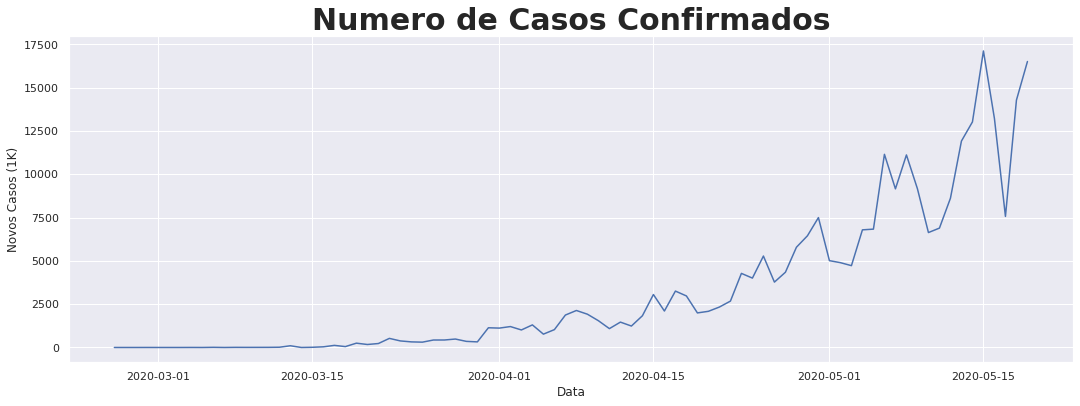

In [16]:
imagem = sns.lineplot(data = dfBrasil, x = 'observationdate', y = 'novoscasos')
imagem.figure.set_size_inches(18,6)
imagem.set_ylabel('Novos Casos (1K)')
imagem.set_xlabel('Data')
imagem.set_title('Numero de Casos Confirmados', fontsize = 30, fontweight = 'bold');

### **1.5.Taxa de Crescimento - Numero de casos por Dia**

Abaixo temos a fórmula para calcular a taxa de crescimento diário onde:

- **Presente** - Valor atual da minha série, ou ultimo valor do meu range
- **Passada** - Primeiro valor da minha séria, ou primeiro valor do meu range de consulta
- **n** - Quantidade de dias ou a diferença entre o passado e o presente 



<p>
  <img src="TaxaCrescimento.png" >
</p>

Como a ideia aqui é possibilitar consultas de formas dinâmicas, eu vou criar uma função onde serão passados os valores de data inicial e data final, assim como o campo onde quero realizar o cálculo. 

Com a mesma função eu posso por exemplo calcular a taxa de pessoas que se recuperam por exemplo. 


In [114]:
def taxaCrescimento(data, variable, dataInicio = None, dataFim = None):
    '''
        aata = Nome do Data Frame onde será realizada a consulta
        variable = Nome da coluna onde será realizada a consulta
        dataInicio = Data Inicial da consulta
        dataFim = Data final da consulta

        Se data de Inicio for None, o programa retornará a primeira data disponível na base de dados
    '''
    if dataInicio == None:     
        dataInicio = data['observationdate'].loc[data[variable]> 0].min() 
    else:
        dataInicio = pd.to_datetime(dataInicio)
    
    if dataFim == None:
        dataFim= data['observationdate'].iloc[-1]
    else:
        dataFim = pd.to_datetime(dataFim)

    # Pegando o valor com base nos parametros de consulta
    passado = data.loc[data['observationdate'] == dataInicio, variable].values[0]
    presente = data.loc[data['observationdate'] == dataFim, variable].values[0]

    # Definindo quantidade de dias
    n = (dataFim - dataInicio).days

    # Calculando a Taxa 
    taxa = (presente/passado)**(1/n) -1

    return taxa * 100

In [113]:
taxaCrescimento(dfBrasil, 'confirmed')

16.27183353112116